Saving Twitter_Data.csv to Twitter_Data.csv
📌 First 5 Rows:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None

🧼 Missing Values:
clean_text    4
category      7
dtype: int64

📊 Classification Report:
              precision    recall  f1-score   support

        -1.0       0.91      0.82      0.87      7152
         0.

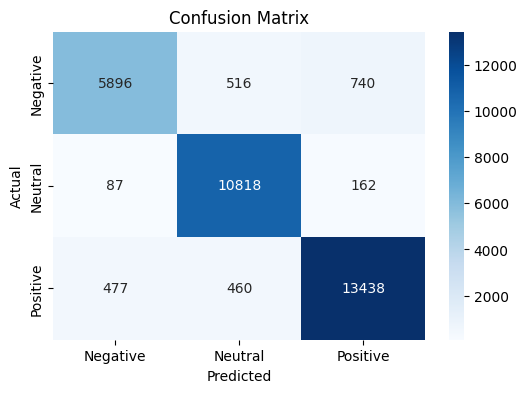


🔮 Sample Predictions:
I love the new update! → Positive
This is the worst experience ever → Negative
It's okay, nothing special → Positive


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re

# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Twitter_Data.csv')

# Step 3: Preview Data
print("📌 First 5 Rows:")
print(df.head())

print("\n🔍 Dataset Info:")
print(df.info())

# Step 4: Check for Missing Values
print("\n🧼 Missing Values:")
print(df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)

# Step 5: Text Cleaning Function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#', '', text)  # Remove mentions/hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning
df['clean_text'] = df['clean_text'].apply(clean_text)

# Step 6: Prepare Features & Target
X = df['clean_text']
y = df['category']  # -1 = Negative, 0 = Neutral, 1 = Positive

# Step 7: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Convert Text to Numerical Data (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 9: Train Model (Logistic Regression)
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# Step 10: Predictions
y_pred = model.predict(X_test_vec)

# Step 11: Evaluation
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Neutral','Positive'], yticklabels=['Negative','Neutral','Positive'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Step 12: Example Predictions
sample_texts = ["I love the new update!", "This is the worst experience ever", "It's okay, nothing special"]
sample_vec = vectorizer.transform(sample_texts)
sample_pred = model.predict(sample_vec)
print("\n🔮 Sample Predictions:")
for text, pred in zip(sample_texts, sample_pred):
    sentiment = { -1: "Negative", 0: "Neutral", 1: "Positive" }[pred]
    print(f"{text} → {sentiment}")
